1.Build a predictive linear regression model for given dataset, given temperature,
humidity, wind speed , wind bearing, visibility, pressure predict apparent
temperature


### Import library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

### Import dataset 

In [2]:
df=pd.read_csv("weatherHistory.csv")

In [3]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [4]:
df.shape

(96453, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [6]:
df.describe(include="all")

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
count,96453,96453,95936,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000,96453
unique,96429,27,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,214
top,2010-08-02 00:00:00.000 +0200,Partly Cloudy,rain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mostly cloudy throughout the day.
freq,2,31733,85224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20085
mean,NaN,NaN,NaN,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956,NaN
std,NaN,NaN,NaN,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906,NaN
min,NaN,NaN,NaN,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,NaN
25%,NaN,NaN,NaN,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000,NaN
50%,NaN,NaN,NaN,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000,NaN
75%,NaN,NaN,NaN,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000,NaN


### Data cleaning 

In [7]:
df=df.drop_duplicates(['Formatted Date'],keep='first')

In [8]:
df.reset_index(inplace=True,drop=True)

In [9]:
df.isna().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [10]:
df=df[df['Precip Type'].notna()]

In [11]:
df.isna().sum()

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

In [12]:
df.shape

(95912, 12)

<AxesSubplot:>

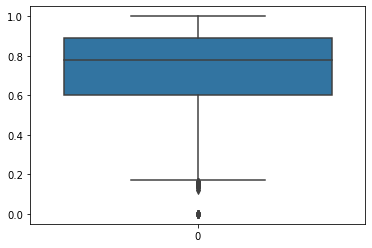

In [14]:
sns.boxplot(data=df['Humidity'])

<AxesSubplot:>

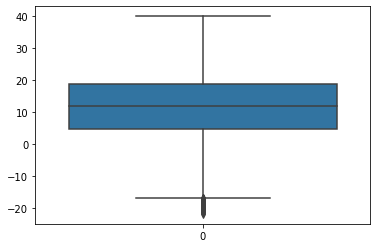

In [15]:
sns.boxplot(data=df['Temperature (C)'])

<AxesSubplot:>

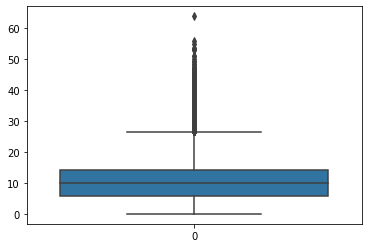

In [16]:
sns.boxplot(data=df['Wind Speed (km/h)'])

<AxesSubplot:>

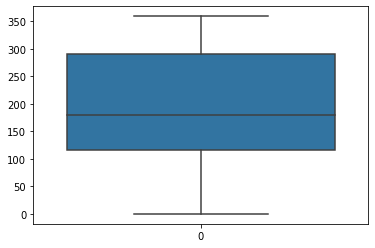

In [17]:
sns.boxplot(data=df['Wind Bearing (degrees)'])


<AxesSubplot:>

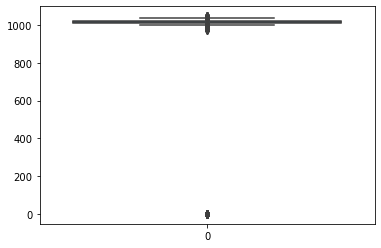

In [18]:
sns.boxplot(data=df['Pressure (millibars)'])

<AxesSubplot:>

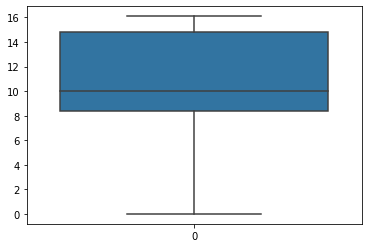

In [19]:
sns.boxplot(data=df['Visibility (km)'])

In [20]:
df=df[(df['Humidity']>0) & (df['Wind Speed (km/h)']<=60) & (df['Pressure (millibars)']>0) & (df['Pressure (millibars)']>0)]

In [21]:
df.shape

(94601, 12)

In [22]:
x=df[['Humidity','Visibility (km)','Temperature (C)','Wind Bearing (degrees)','Wind Speed (km/h)','Pressure (millibars)']]

In [23]:
x

,Humidity,Visibility (km),Temperature (C),Wind Bearing (degrees),Wind Speed (km/h),Pressure (millibars)
0,0.89,15.8263,9.472222,251.0,14.1197,1015.13
1,0.86,15.8263,9.355556,259.0,14.2646,1015.63
2,0.89,14.9569,9.377778,204.0,3.9284,1015.94
3,0.83,15.8263,8.288889,269.0,14.1036,1016.41
4,0.83,15.8263,8.755556,259.0,11.0446,1016.51
...,...,...,...,...,...,...
96424,0.43,16.1000,26.016667,31.0,10.9963,1014.36
96425,0.48,15.5526,24.583333,20.0,10.0947,1015.16
96426,0.56,16.1000,22.038889,30.0,8.9838,1015.66
96427,0.60,16.1000,21.522222,20.0,10.5294,1015.95


In [24]:
y=df['Apparent Temperature (C)']
y

0         7.388889
1         7.227778
2         9.377778
3         5.944444
4         6.977778
           ...    
96424    26.016667
96425    24.583333
96426    22.038889
96427    21.522222
96428    20.438889
Name: Apparent Temperature (C), Length: 94601, dtype: float64

### feature scalling

D:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

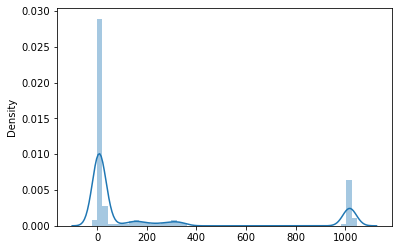

In [25]:
sns.distplot(x)

In [26]:
def standardScalling(x):
    x_mean=np.mean(x,axis=0)
    x_std=np.std(x,axis=0)
    x_scale=(x-x_mean)/x_std
    return x_scale

In [27]:
y=standardScalling(y)
x=standardScalling(x)


In [28]:
x

,Humidity,Visibility (km),Temperature (C),Wind Bearing (degrees),Wind Speed (km/h),Pressure (millibars)
0,0.792263,1.302447,-0.260371,0.591826,0.484251,-0.214837
1,0.638840,1.302447,-0.272578,0.666319,0.505261,-0.150475
2,0.792263,1.093842,-0.270253,0.154182,-0.993448,-0.110570
3,0.485417,1.302447,-0.384183,0.759435,0.481917,-0.050069
4,0.485417,1.302447,-0.335356,0.666319,0.038373,-0.037197
...,...,...,...,...,...,...
96424,-1.560225,1.368120,1.470676,-1.456721,0.031370,-0.313955
96425,-1.304520,1.236775,1.320706,-1.559148,-0.099358,-0.210975
96426,-0.895391,1.368120,1.054480,-1.466033,-0.260435,-0.146613
96427,-0.690827,1.368120,1.000421,-1.559148,-0.036329,-0.109283


In [29]:
y

0       -0.327200
1       -0.342259
2       -0.141294
3       -0.462215
4       -0.365627
           ...   
96424    1.413979
96425    1.280002
96426    1.042168
96427    0.993874
96428    0.892612
Name: Apparent Temperature (C), Length: 94601, dtype: float64

### split dataset into training and testing 

In [30]:
split_ratio=0.8
split_index=int(split_ratio*len(x))
x_train=x[:split_index].values
x_test=x[split_index:].values
y_train=y[:split_index].values
y_test=y[split_index:].values

In [31]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((75680, 6), (75680,), (18921, 6), (18921,))

In [32]:
theta=np.zeros((1,7))
theta.shape

(1, 7)

In [33]:
y_train=y_train.reshape(-1,1)
y_test=y_test.reshape(-1,1)
y_train.shape,y_test.shape

((75680, 1), (18921, 1))

In [34]:
x1=np.ones((x_train.shape[0],1))
x_train=np.concatenate((x1,x_train),axis=1)
x_train.shape

(75680, 7)

In [1]:
def compute_cost(x_train,y_train,theta):
    """
    Description :
        This function is used to calculate cost
    Parameters :
        x_train: actual data traing
        y_train:prdicted data traing
        theta:parameters
    Return :
        It returns the cost
    """ 
    hx=np.dot(x_train,theta.T) 
    cost=np.sum((hx-y_train)**2)/(2*len(x_train))
    return cost     
      

In [2]:
def gradient_descent(x_train,y_train,theta,alpha,epoch):
    """
    Description :
        This function is used to update paramenter(theata)
    Parameters :
        x_train: actual data traing
        y_train:prdicted data traing
        theta:parameters
        alpha : learning rate
        epoch :number of iterations
    Return :
        It returns the updated theta
    """ 
    for i in range(epoch):
        hx=np.dot(x_train,theta.T)       
        
        theta=theta-alpha/(len(x_train))*np.sum((hx-y_train)*x_train,axis=0)
        cost=compute_cost(x_train,y_train,theta)
        print(f"Epoch {i+1} theta0 = {theta[0][0]} theta1 = {theta[0][1]} cost = {cost}")
    return theta,cost

In [37]:
epoch=1100
alpha=0.7
result_theta,cost=gradient_descent(x_train,y_train,theta,alpha,epoch)
print(result_theta,cost)

Epoch 1 theta0 = -0.00792269169622473 theta1 = -0.43500001716595654 cost = 0.12331011987667051
Epoch 2 theta0 = -0.00725141391078767 theta1 = -0.18500481170340077 cost = 0.0465950910064264
Epoch 3 theta0 = -0.007388915667475978 theta1 = -0.2317808063611884 cost = 0.025836464238152647
Epoch 4 theta0 = -0.006972561744815704 theta1 = -0.15448436456078998 cost = 0.017831951071107594
Epoch 5 theta0 = -0.00645392570683614 theta1 = -0.14154961007383837 cost = 0.013596453238645848
Epoch 6 theta0 = -0.005681369504809026 theta1 = -0.10734540921931222 cost = 0.0109386967779028
Epoch 7 theta0 = -0.0048875824498524345 theta1 = -0.0889940696482371 cost = 0.009157947692861596
Epoch 8 theta0 = -0.00410462081793444 theta1 = -0.06894664652238441 cost = 0.007938376770590913
Epoch 9 theta0 = -0.003397399109759231 theta1 = -0.05424148070188208 cost = 0.0070972090447056595
Epoch 10 theta0 = -0.0027720944062044756 theta1 = -0.041027992614708964 cost = 0.0065157010995235826
Epoch 11 theta0 = -0.00223452713012

Epoch 105 theta0 = 0.0005557140120242548 theta1 = 0.023086933458016653 cost = 0.005209184980108731
Epoch 106 theta0 = 0.0005557140266565912 theta1 = 0.02308693373500412 cost = 0.005209184980108731
Epoch 107 theta0 = 0.0005557140388297481 theta1 = 0.02308693396543968 cost = 0.005209184980108731
Epoch 108 theta0 = 0.0005557140489570215 theta1 = 0.02308693415714703 cost = 0.00520918498010873
Epoch 109 theta0 = 0.0005557140573822534 theta1 = 0.023086934316635124 cost = 0.005209184980108731
Epoch 110 theta0 = 0.0005557140643914995 theta1 = 0.02308693444931881 cost = 0.005209184980108731
Epoch 111 theta0 = 0.0005557140702227363 theta1 = 0.02308693455970307 cost = 0.005209184980108731
Epoch 112 theta0 = 0.0005557140750739453 theta1 = 0.023086934651535558 cost = 0.00520918498010873
Epoch 113 theta0 = 0.0005557140791098379 theta1 = 0.023086934727934237 cost = 0.005209184980108731
Epoch 114 theta0 = 0.0005557140824674391 theta1 = 0.02308693479149303 cost = 0.005209184980108729
Epoch 115 theta0 =

Epoch 206 theta0 = 0.0005557140990878193 theta1 = 0.023086935106113687 cost = 0.005209184980108731
Epoch 207 theta0 = 0.0005557140990878193 theta1 = 0.023086935106113687 cost = 0.005209184980108731
Epoch 208 theta0 = 0.0005557140990878193 theta1 = 0.023086935106113687 cost = 0.005209184980108731
Epoch 209 theta0 = 0.0005557140990878193 theta1 = 0.023086935106113687 cost = 0.005209184980108731
Epoch 210 theta0 = 0.0005557140990878193 theta1 = 0.023086935106113687 cost = 0.005209184980108731
Epoch 211 theta0 = 0.0005557140990878193 theta1 = 0.023086935106113687 cost = 0.005209184980108731
Epoch 212 theta0 = 0.0005557140990878193 theta1 = 0.023086935106113687 cost = 0.005209184980108731
Epoch 213 theta0 = 0.0005557140990878193 theta1 = 0.023086935106113687 cost = 0.005209184980108731
Epoch 214 theta0 = 0.0005557140990878193 theta1 = 0.023086935106113687 cost = 0.005209184980108731
Epoch 215 theta0 = 0.0005557140990878193 theta1 = 0.023086935106113687 cost = 0.005209184980108731
Epoch 216 

Epoch 308 theta0 = 0.0005557140990878193 theta1 = 0.023086935106113687 cost = 0.005209184980108731
Epoch 309 theta0 = 0.0005557140990878193 theta1 = 0.023086935106113687 cost = 0.005209184980108731
Epoch 310 theta0 = 0.0005557140990878193 theta1 = 0.023086935106113687 cost = 0.005209184980108731
Epoch 311 theta0 = 0.0005557140990878193 theta1 = 0.023086935106113687 cost = 0.005209184980108731
Epoch 312 theta0 = 0.0005557140990878193 theta1 = 0.023086935106113687 cost = 0.005209184980108731
Epoch 313 theta0 = 0.0005557140990878193 theta1 = 0.023086935106113687 cost = 0.005209184980108731
Epoch 314 theta0 = 0.0005557140990878193 theta1 = 0.023086935106113687 cost = 0.005209184980108731
Epoch 315 theta0 = 0.0005557140990878193 theta1 = 0.023086935106113687 cost = 0.005209184980108731
Epoch 316 theta0 = 0.0005557140990878193 theta1 = 0.023086935106113687 cost = 0.005209184980108731
Epoch 317 theta0 = 0.0005557140990878193 theta1 = 0.023086935106113687 cost = 0.005209184980108731
Epoch 318 

Epoch 416 theta0 = 0.0005557140990878193 theta1 = 0.023086935106113687 cost = 0.005209184980108731
Epoch 417 theta0 = 0.0005557140990878193 theta1 = 0.023086935106113687 cost = 0.005209184980108731
Epoch 418 theta0 = 0.0005557140990878193 theta1 = 0.023086935106113687 cost = 0.005209184980108731
Epoch 419 theta0 = 0.0005557140990878193 theta1 = 0.023086935106113687 cost = 0.005209184980108731
Epoch 420 theta0 = 0.0005557140990878193 theta1 = 0.023086935106113687 cost = 0.005209184980108731
Epoch 421 theta0 = 0.0005557140990878193 theta1 = 0.023086935106113687 cost = 0.005209184980108731
Epoch 422 theta0 = 0.0005557140990878193 theta1 = 0.023086935106113687 cost = 0.005209184980108731
Epoch 423 theta0 = 0.0005557140990878193 theta1 = 0.023086935106113687 cost = 0.005209184980108731
Epoch 424 theta0 = 0.0005557140990878193 theta1 = 0.023086935106113687 cost = 0.005209184980108731
Epoch 425 theta0 = 0.0005557140990878193 theta1 = 0.023086935106113687 cost = 0.005209184980108731
Epoch 426 

Epoch 524 theta0 = 0.0005557140990878193 theta1 = 0.023086935106113687 cost = 0.005209184980108731
Epoch 525 theta0 = 0.0005557140990878193 theta1 = 0.023086935106113687 cost = 0.005209184980108731
Epoch 526 theta0 = 0.0005557140990878193 theta1 = 0.023086935106113687 cost = 0.005209184980108731
Epoch 527 theta0 = 0.0005557140990878193 theta1 = 0.023086935106113687 cost = 0.005209184980108731
Epoch 528 theta0 = 0.0005557140990878193 theta1 = 0.023086935106113687 cost = 0.005209184980108731
Epoch 529 theta0 = 0.0005557140990878193 theta1 = 0.023086935106113687 cost = 0.005209184980108731
Epoch 530 theta0 = 0.0005557140990878193 theta1 = 0.023086935106113687 cost = 0.005209184980108731
Epoch 531 theta0 = 0.0005557140990878193 theta1 = 0.023086935106113687 cost = 0.005209184980108731
Epoch 532 theta0 = 0.0005557140990878193 theta1 = 0.023086935106113687 cost = 0.005209184980108731
Epoch 533 theta0 = 0.0005557140990878193 theta1 = 0.023086935106113687 cost = 0.005209184980108731
Epoch 534 

Epoch 627 theta0 = 0.0005557140990878193 theta1 = 0.023086935106113687 cost = 0.005209184980108731
Epoch 628 theta0 = 0.0005557140990878193 theta1 = 0.023086935106113687 cost = 0.005209184980108731
Epoch 629 theta0 = 0.0005557140990878193 theta1 = 0.023086935106113687 cost = 0.005209184980108731
Epoch 630 theta0 = 0.0005557140990878193 theta1 = 0.023086935106113687 cost = 0.005209184980108731
Epoch 631 theta0 = 0.0005557140990878193 theta1 = 0.023086935106113687 cost = 0.005209184980108731
Epoch 632 theta0 = 0.0005557140990878193 theta1 = 0.023086935106113687 cost = 0.005209184980108731
Epoch 633 theta0 = 0.0005557140990878193 theta1 = 0.023086935106113687 cost = 0.005209184980108731
Epoch 634 theta0 = 0.0005557140990878193 theta1 = 0.023086935106113687 cost = 0.005209184980108731
Epoch 635 theta0 = 0.0005557140990878193 theta1 = 0.023086935106113687 cost = 0.005209184980108731
Epoch 636 theta0 = 0.0005557140990878193 theta1 = 0.023086935106113687 cost = 0.005209184980108731
Epoch 637 

Epoch 732 theta0 = 0.0005557140990878193 theta1 = 0.023086935106113687 cost = 0.005209184980108731
Epoch 733 theta0 = 0.0005557140990878193 theta1 = 0.023086935106113687 cost = 0.005209184980108731
Epoch 734 theta0 = 0.0005557140990878193 theta1 = 0.023086935106113687 cost = 0.005209184980108731
Epoch 735 theta0 = 0.0005557140990878193 theta1 = 0.023086935106113687 cost = 0.005209184980108731
Epoch 736 theta0 = 0.0005557140990878193 theta1 = 0.023086935106113687 cost = 0.005209184980108731
Epoch 737 theta0 = 0.0005557140990878193 theta1 = 0.023086935106113687 cost = 0.005209184980108731
Epoch 738 theta0 = 0.0005557140990878193 theta1 = 0.023086935106113687 cost = 0.005209184980108731
Epoch 739 theta0 = 0.0005557140990878193 theta1 = 0.023086935106113687 cost = 0.005209184980108731
Epoch 740 theta0 = 0.0005557140990878193 theta1 = 0.023086935106113687 cost = 0.005209184980108731
Epoch 741 theta0 = 0.0005557140990878193 theta1 = 0.023086935106113687 cost = 0.005209184980108731
Epoch 742 

Epoch 843 theta0 = 0.0005557140990878193 theta1 = 0.023086935106113687 cost = 0.005209184980108731
Epoch 844 theta0 = 0.0005557140990878193 theta1 = 0.023086935106113687 cost = 0.005209184980108731
Epoch 845 theta0 = 0.0005557140990878193 theta1 = 0.023086935106113687 cost = 0.005209184980108731
Epoch 846 theta0 = 0.0005557140990878193 theta1 = 0.023086935106113687 cost = 0.005209184980108731
Epoch 847 theta0 = 0.0005557140990878193 theta1 = 0.023086935106113687 cost = 0.005209184980108731
Epoch 848 theta0 = 0.0005557140990878193 theta1 = 0.023086935106113687 cost = 0.005209184980108731
Epoch 849 theta0 = 0.0005557140990878193 theta1 = 0.023086935106113687 cost = 0.005209184980108731
Epoch 850 theta0 = 0.0005557140990878193 theta1 = 0.023086935106113687 cost = 0.005209184980108731
Epoch 851 theta0 = 0.0005557140990878193 theta1 = 0.023086935106113687 cost = 0.005209184980108731
Epoch 852 theta0 = 0.0005557140990878193 theta1 = 0.023086935106113687 cost = 0.005209184980108731
Epoch 853 

Epoch 946 theta0 = 0.0005557140990878193 theta1 = 0.023086935106113687 cost = 0.005209184980108731
Epoch 947 theta0 = 0.0005557140990878193 theta1 = 0.023086935106113687 cost = 0.005209184980108731
Epoch 948 theta0 = 0.0005557140990878193 theta1 = 0.023086935106113687 cost = 0.005209184980108731
Epoch 949 theta0 = 0.0005557140990878193 theta1 = 0.023086935106113687 cost = 0.005209184980108731
Epoch 950 theta0 = 0.0005557140990878193 theta1 = 0.023086935106113687 cost = 0.005209184980108731
Epoch 951 theta0 = 0.0005557140990878193 theta1 = 0.023086935106113687 cost = 0.005209184980108731
Epoch 952 theta0 = 0.0005557140990878193 theta1 = 0.023086935106113687 cost = 0.005209184980108731
Epoch 953 theta0 = 0.0005557140990878193 theta1 = 0.023086935106113687 cost = 0.005209184980108731
Epoch 954 theta0 = 0.0005557140990878193 theta1 = 0.023086935106113687 cost = 0.005209184980108731
Epoch 955 theta0 = 0.0005557140990878193 theta1 = 0.023086935106113687 cost = 0.005209184980108731
Epoch 956 

Epoch 1052 theta0 = 0.0005557140990878193 theta1 = 0.023086935106113687 cost = 0.005209184980108731
Epoch 1053 theta0 = 0.0005557140990878193 theta1 = 0.023086935106113687 cost = 0.005209184980108731
Epoch 1054 theta0 = 0.0005557140990878193 theta1 = 0.023086935106113687 cost = 0.005209184980108731
Epoch 1055 theta0 = 0.0005557140990878193 theta1 = 0.023086935106113687 cost = 0.005209184980108731
Epoch 1056 theta0 = 0.0005557140990878193 theta1 = 0.023086935106113687 cost = 0.005209184980108731
Epoch 1057 theta0 = 0.0005557140990878193 theta1 = 0.023086935106113687 cost = 0.005209184980108731
Epoch 1058 theta0 = 0.0005557140990878193 theta1 = 0.023086935106113687 cost = 0.005209184980108731
Epoch 1059 theta0 = 0.0005557140990878193 theta1 = 0.023086935106113687 cost = 0.005209184980108731
Epoch 1060 theta0 = 0.0005557140990878193 theta1 = 0.023086935106113687 cost = 0.005209184980108731
Epoch 1061 theta0 = 0.0005557140990878193 theta1 = 0.023086935106113687 cost = 0.005209184980108731


In [38]:
result_theta

array([[ 5.55714099e-04,  2.30869351e-02,  7.10381727e-04,
         1.01031752e+00,  5.40560700e-03, -6.12255746e-02,
         9.94778817e-03]])

In [39]:
x1=np.ones((x_test.shape[0],1))
x_test=np.concatenate((x1,x_test),axis=1)
x_test.shape

(18921, 7)

In [40]:
y_pred=np.dot(x_test,result_theta.T)

In [42]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [43]:
R2_score=round(r2_score(y_test,y_pred),2)
R2_score

0.99

In [44]:
mean_square_error1=round(mean_squared_error(y_test,y_pred),2)
mean_square_error1

0.01

In [45]:
mean_absolute_error1=round(mean_absolute_error(y_test,y_pred))
mean_absolute_error1

0

In [48]:
root_mean_square_error=round(math.sqrt(mean_square_error1))
root_mean_square_error

0